# 引入包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 不平衡样本
from imblearn.under_sampling import RandomUnderSampler
# label2number
from sklearn.preprocessing import LabelEncoder, StandardScaler
# split
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
# lgbm
from lightgbm import LGBMClassifier
# loss
from sklearn.metrics import log_loss
# one-hot
from sklearn.preprocessing import OneHotEncoder
#
from sklearn.decomposition import PCA

# 读取文件

In [2]:
train_data = pd.read_csv("../data/otto/train.csv")
train_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
train_data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [4]:
train_data.shape, train_data.size

((61878, 95), 5878410)

In [5]:
train_data.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

# seaborn图形可视化查看数据分布

<AxesSubplot: xlabel='target', ylabel='count'>

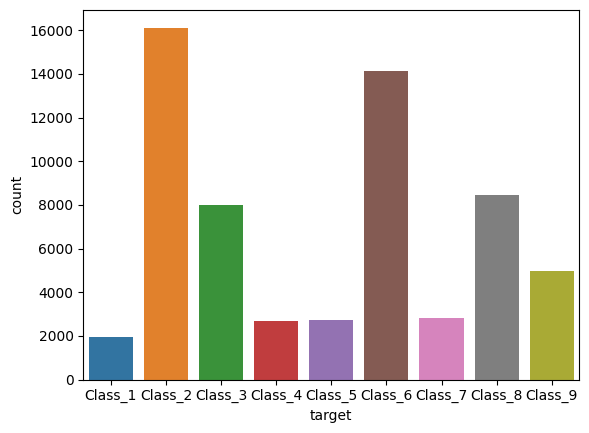

In [12]:
sns.countplot(x=train_data["target"])

<AxesSubplot: xlabel='target', ylabel='count'>

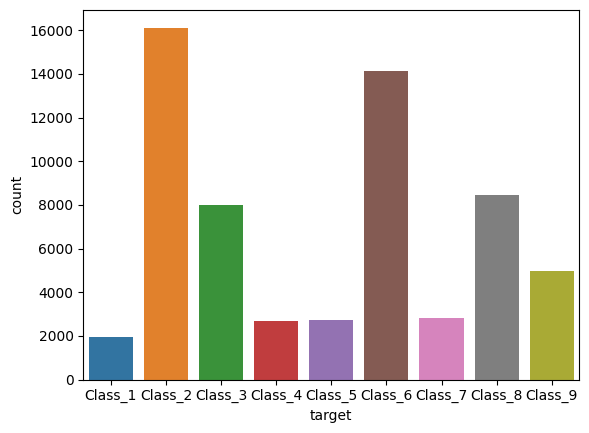

In [13]:
sns.countplot(train_data, x="target")

<AxesSubplot: xlabel='target', ylabel='Count'>

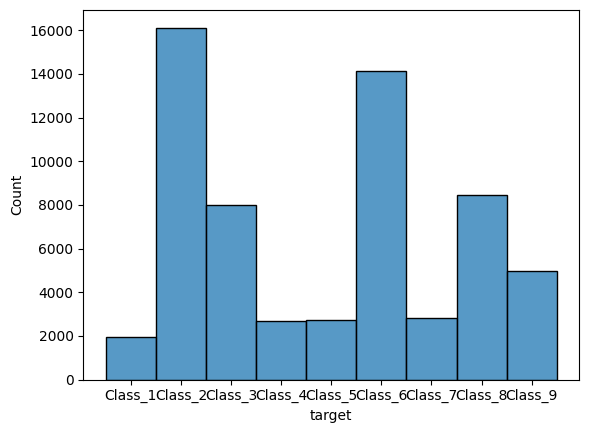

In [14]:
# 这样写不能加 hue="target"
sns.histplot(train_data["target"])

<AxesSubplot: xlabel='target', ylabel='Count'>

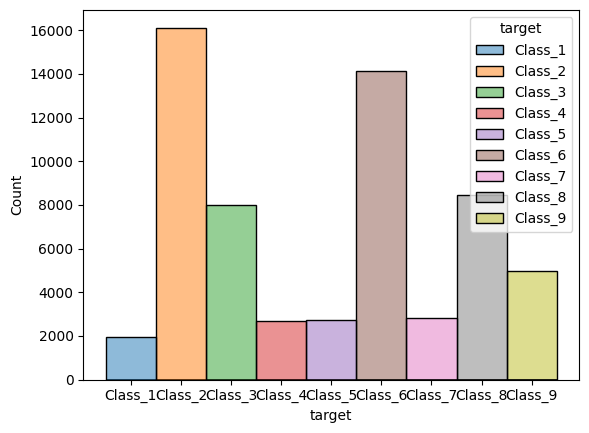

In [15]:
sns.histplot(train_data, x="target", hue="target")

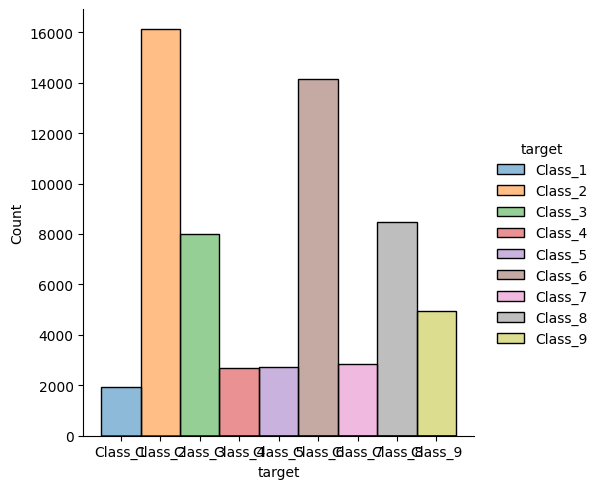

In [16]:
# 和上面的参数可以写一样
sns.displot(train_data, x="target", hue="target")

上图可以看出,该数据类别不均衡,所以需要后期处理
# 数据基本处理
数据已经经过脱敏,不需要特殊处理

## 截取部分数据

In [17]:
train_data1 = train_data[:1000]
train_data1.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


<AxesSubplot: xlabel='target', ylabel='count'>

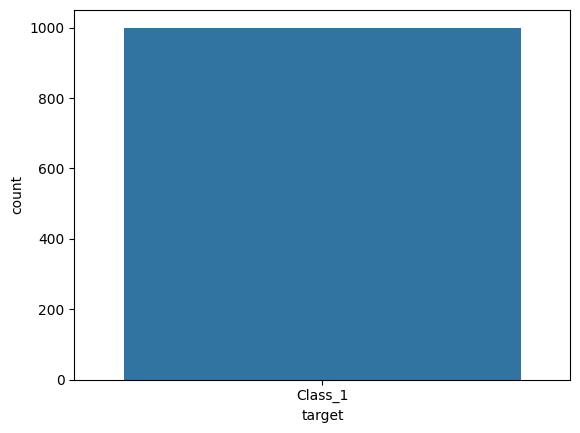

In [19]:
# 只有类别1
sns.countplot(train_data1, x="target")

## 使用随机欠采样获取数据

In [20]:
# 首先确定特征值/目标值
y = train_data["target"]
y.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [21]:
under = RandomUnderSampler(random_state=0)

In [22]:
train_data.shape, y.shape

((61878, 95), (61878,))

In [23]:
train_data_resampled, y_resampled = under.fit_resample(train_data, y)
train_data_resampled.shape, y_resampled.shape

((17361, 95), (17361,))

In [24]:
train_data_resampled.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


<AxesSubplot: xlabel='target', ylabel='count'>

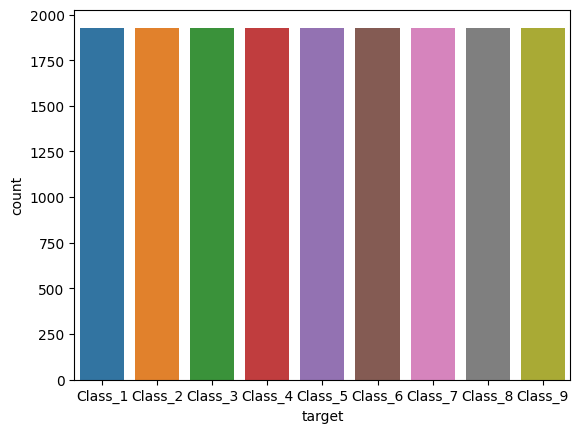

In [27]:
sns.countplot(x=train_data_resampled["target"])

In [26]:
# 去除id和target
x_resampled = train_data_resampled.drop(["id", "target"], axis=1)
x_resampled.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## 目标标签值转换成数字 LabelEncoder

In [19]:
y_resampled.head()

0    Class_1
1    Class_1
2    Class_1
3    Class_1
4    Class_1
Name: target, dtype: object

In [20]:
le = LabelEncoder()

In [21]:
y_resampled_num = le.fit_transform(y_resampled)
y_resampled_num

array([0, 0, 0, ..., 8, 8, 8])

## 分割数据 train_test_split

In [22]:
x_train, x_val, y_train, y_val = train_test_split(x_resampled, y_resampled_num, test_size=0.2, random_state=0)

In [23]:
y_train.shape, y_val.shape

((13888,), (3473,))

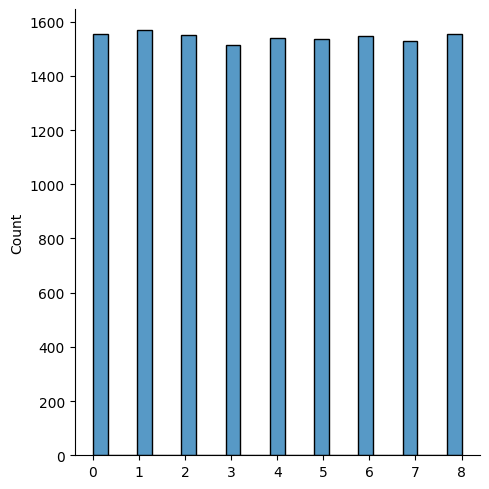

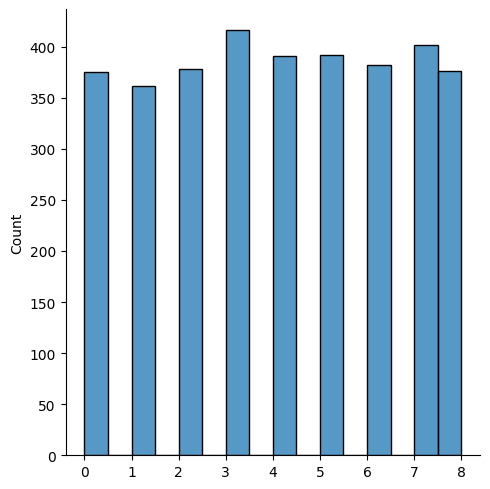

In [24]:
sns.displot(y_train)
sns.displot(y_val)
# 可以看到数据没有完全相等

## 分割数据(使用StratifiedShuffleSplit)

In [25]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

In [26]:
for train_i, val_i in sss.split(x_resampled, y_resampled_num):
    # 测试能不能正常使用
    print(len(train_i)) # 13888
    print(len(val_i))   # 3473

    # x,y的训练和测试要一一对应
    # 获取验证集和测试集
    x_train_sss = x_resampled.values[train_i]
    x_val_sss = x_resampled.values[val_i]

    y_train_sss = y_resampled_num[train_i]
    y_val_sss = y_resampled_num[val_i]

x_train_sss.shape, x_val_sss.shape, y_train_sss.shape, y_val_sss.shape

13888
3473


((13888, 93), (3473, 93), (13888,), (3473,))

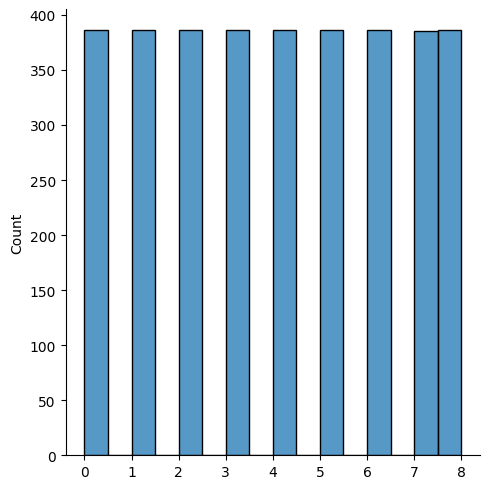

In [27]:
sns.displot(y_val_sss)
# 数据严格分隔了

## 特征数据标准化StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(x_train_sss)

x_train_scaled = scaler.transform(x_train_sss)
x_val_scaled = scaler.transform(x_val_sss)

## PCA数据降维

In [30]:
pca = PCA(n_components=0.9)

In [31]:
pca.fit(x_train_scaled)

x_train_pca = pca.transform(x_train_scaled)
x_val_pca = pca.transform(x_val_scaled)

In [32]:
x_train_scaled.shape, x_train_pca.shape
# 93 -> 65

((13888, 93), (13888, 65))

### 降维数据可视化

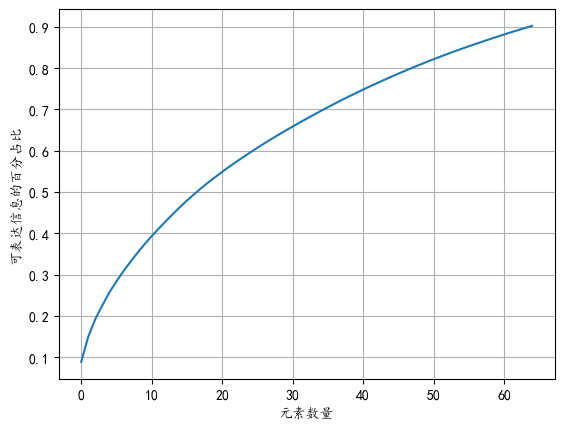

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("元素数量")
plt.ylabel("可表达信息的百分占比")
plt.grid()
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.show()

# 模型训练

## 基本模型训练

In [34]:
lgbmc = LGBMClassifier()

In [35]:
lgbmc.fit(x_train_pca, y_train_sss)

LGBMClassifier()

In [37]:
lgbmc.score(x_val_pca, y_val_sss)

0.7457529513389001

In [41]:
y_predict = lgbmc.predict(x_val_pca)
y_predict

array([0, 8, 2, ..., 7, 0, 7])

## 数据可视化
展示效果不是很好

<AxesSubplot: ylabel='count'>

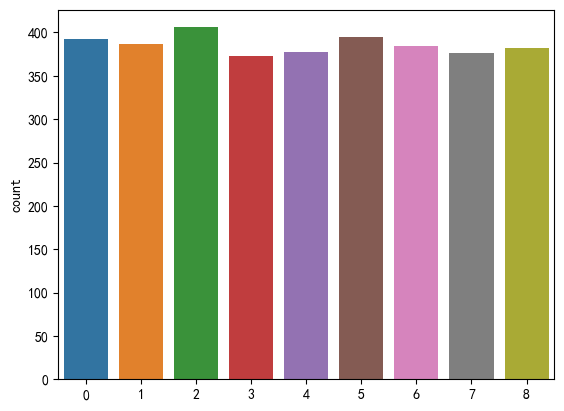

In [ ]:
sns.countplot(x=y_predict)

## log_loss模型评估,越小越好

## 将数据修改为OneHot格式

In [43]:
one_hot = OneHotEncoder(sparse_output=False)

In [44]:
one_hot.fit(y_val_sss.reshape(-1, 1))

y_val_one_hot = one_hot.transform(y_val_sss.reshape(-1, 1))
y_predict_one_hot = one_hot.transform(y_predict.reshape(-1, 1))
y_val_one_hot, y_predict_one_hot

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

## predict_proba 改变预测值的输出模式,让输出结果为百分占比,降低log_loss值

In [45]:
y_pred_proba = lgbmc.predict_proba(x_val_pca)
# 结果全是百分比,并且类型是二维数组,就是onehot模式,直接使用即可
y_pred_proba

array([[5.81496297e-01, 2.82924794e-03, 1.91632340e-03, ...,
        8.63453401e-02, 2.04955186e-02, 8.12719888e-02],
       [2.72336063e-02, 1.10575376e-03, 5.82891405e-04, ...,
        5.67800744e-04, 2.40681625e-03, 9.63462678e-01],
       [1.26722439e-03, 1.55596008e-01, 7.99195232e-01, ...,
        7.79647720e-03, 2.86693613e-04, 1.78865894e-04],
       ...,
       [7.42263124e-02, 6.25318927e-04, 1.12622929e-03, ...,
        7.57095526e-02, 8.45060771e-01, 2.50226108e-03],
       [8.65814092e-01, 1.38721378e-02, 6.01886672e-03, ...,
        9.27081994e-02, 1.14897881e-02, 8.50400288e-03],
       [2.15421932e-04, 6.46836941e-04, 1.69701423e-03, ...,
        4.76377558e-04, 9.95063983e-01, 3.23365093e-04]])

In [46]:
log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)

0.6918555186278145

# 网格搜索,交叉验证

In [57]:
lgbmc_gs = LGBMClassifier()

In [56]:
param_grid = {
    "learning_rate": [0.01, 0.1, 1],
    "n_estimators": range(50, 101, 10),
    "num_leaves": np.arange(10, 50 , 10),
}

In [58]:
gs = GridSearchCV(lgbmc_gs, param_grid, n_jobs=-1)

In [59]:
gs.fit(x_train_pca, y_train_sss)

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': range(50, 101, 10),
                         'num_leaves': array([10, 20, 30, 40])})

In [60]:
gs.score(x_val_pca, y_val_sss)

0.7474805643535848

In [61]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 40}

# 确定最优模型


In [62]:
best_lgbmc = LGBMClassifier(**gs.best_params_)

In [63]:
best_lgbmc.fit(x_train_pca, y_train_sss, eval_set=[(x_val_pca, y_val_sss)], eval_metric='logloss')

[1]	valid_0's multi_logloss: 1.84277
[2]	valid_0's multi_logloss: 1.63817
[3]	valid_0's multi_logloss: 1.49588
[4]	valid_0's multi_logloss: 1.38061
[5]	valid_0's multi_logloss: 1.28813
[6]	valid_0's multi_logloss: 1.21269
[7]	valid_0's multi_logloss: 1.1489
[8]	valid_0's multi_logloss: 1.09548
[9]	valid_0's multi_logloss: 1.04972
[10]	valid_0's multi_logloss: 1.01151
[11]	valid_0's multi_logloss: 0.976889
[12]	valid_0's multi_logloss: 0.947211
[13]	valid_0's multi_logloss: 0.920766
[14]	valid_0's multi_logloss: 0.898655
[15]	valid_0's multi_logloss: 0.878356
[16]	valid_0's multi_logloss: 0.860112
[17]	valid_0's multi_logloss: 0.8443
[18]	valid_0's multi_logloss: 0.830405
[19]	valid_0's multi_logloss: 0.818124
[20]	valid_0's multi_logloss: 0.806777
[21]	valid_0's multi_logloss: 0.79669
[22]	valid_0's multi_logloss: 0.786975
[23]	valid_0's multi_logloss: 0.777891
[24]	valid_0's multi_logloss: 0.76999
[25]	valid_0's multi_logloss: 0.762594
[26]	valid_0's multi_logloss: 0.755393
[27]	valid

LGBMClassifier(num_leaves=40)

In [64]:
best_lgbmc.score(x_val_pca, y_val_sss)

0.7474805643535848

In [65]:
# 预测概率,需要one-hot编码
y_pred_proba = best_lgbmc.predict_proba(x_val_pca)
log_loss(y_val_one_hot, y_pred_proba, eps=1e-15, normalize=True)

0.7055219441382554

# Test

In [66]:
test_data = pd.read_csv("../data/otto/test.csv")
test_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


## 去除id列

In [67]:
test_data_drop_id = test_data.drop('id', axis=1)
test_data_drop_id[:5]

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


## 特征数据标准化StandardScaler(训练数据标准化,测试数据也需要)

In [68]:
test_data_scaler = scaler.transform(test_data_drop_id)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## PCA数据降维(训练数据降维,测试数据也需要)

In [69]:
test_data_pca = pca.transform(test_data_scaler)

## 预测test数据结果

In [70]:
y_pred_test = best_lgbmc.predict(test_data_pca)
y_pred_test

array([3, 5, 5, ..., 2, 3, 2])

In [71]:
y_pred_test.shape

(144368,)

## 对比其他得分

In [72]:
submission = pd.read_csv("../data/otto/submission.csv")
submission[:5]

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0.034286,0.040000,0.060000,0.774107,0.000000,0.022857,0.040179,0.005714,0.022857
1,2,0.114286,0.040000,0.034286,0.034286,0.017143,0.485714,0.028571,0.217143,0.028571
2,3,0.005714,0.000000,0.000000,0.000000,0.000000,0.988571,0.000000,0.005714,0.000000
3,4,0.027714,0.215714,0.300000,0.277143,0.000000,0.000000,0.017143,0.006286,0.156000
4,5,0.237060,0.000080,0.005834,0.000000,0.005954,0.023057,0.018190,0.199658,0.510166


In [73]:
# 去除id列
submission_drop_id = submission.drop("id", axis=1)
submission_drop_id.shape

(144368, 9)

In [74]:
# 得到最大的得分id
result = np.argmax(submission_drop_id.values, axis=1)
result.shape

(144368,)

In [75]:
# 和另一个提交的结果相似率为 91%
np.equal(y_pred_test, result).sum() / result.size

0.7915743100964202